In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.DataFrame({
    'x': [0.1, 0.3, 0.6, 0.7],
    'y':[0.2, 0.25, 0.4, 0.7],
})
df

,x,y
0,0.1,0.20
1,0.3,0.25
2,0.6,0.40
3,0.7,0.70


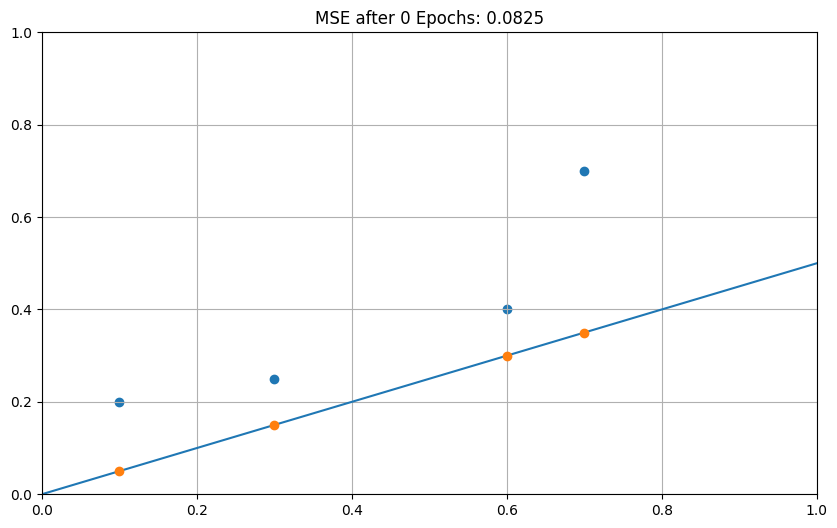

In [4]:
init_w11 = 0.5
init_b11 = 0
init_predictions = [0.05, 0.15, 0.30, 0.35]

fig, ax = plt.subplots(figsize=(10, 6))
ax.axline((0, init_b11), slope=init_w11)
ax.scatter(df['x'], df['y'])
ax.scatter(df['x'], init_predictions, zorder=3)
ax.set_title("MSE after 0 Epochs: {}".format(0.0825))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.grid()
plt.show()

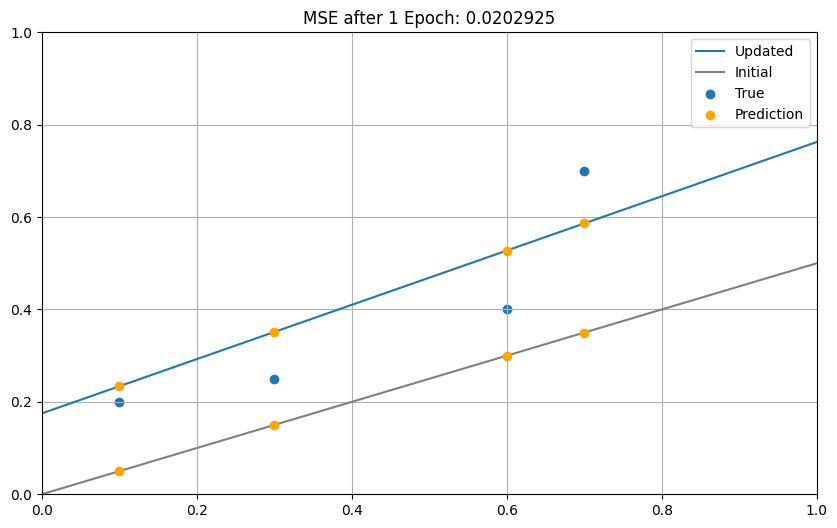

In [5]:
w11 = 0.5875
b11 = 0.175
second_predictions = [0.23375, 0.35125, 0.5275, 0.58625]

fig, ax = plt.subplots(figsize=(10, 6))
ax.axline((0, b11), slope=w11, label="Updated")
ax.axline((0, init_b11), slope=init_w11, c='grey', label='Initial')
ax.scatter(df['x'], df['y'], label="True")
ax.scatter(df['x'], second_predictions, zorder=3, c='orange', label="Prediction")
ax.scatter(df['x'], init_predictions, zorder=3, c='orange')
ax.set_title("MSE after 1 Epoch: {}".format(0.0202925))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.legend()
ax.grid()
plt.show()

In [11]:
class SimpleNeuralNetwork():
    def __init__(self, X, Y):
        self.w1 = 0.5
        self.w2 = 0.1
        self.b = 0
        self.preds = []
        self.lr = 1
        self.X = X
        self.Y = Y
        
    def predict(self, X):
        return self.w1 * X + self.w2 * (X * X) + self.b

    def forward_pass(self):
        self.preds = []
        for x in self.X:
            y_hat = self.predict(x)
            self.preds.append(y_hat)

    def calc_error(self):
        # 1/2 * MSE (Mean Squared Error)
        return 1/2 * sum([(y - yhat)**2 for y, yhat in zip(self.Y, self.preds)])
        
    def back_prop(self):
        w1s = []
        w2s = []
        bs = []
        
        # -- Chained partial derivatives --
        for x, y, yhat in zip(self.X, self.Y, self.preds):
            w1s.append((-(y - yhat)) * 1 * (x))
            w2s.append((-(y - yhat)) * 1 * (x**2))
            bs.append((-(y - yhat)) * 1 * 1)

        w1_change = sum(w1s) / len(w1s)
        w2_change = sum(w2s) / len(w2s)
        b_change = sum(bs) / len(bs)

        # -- Updating weights and biases --
        self.w1 = self.w1 - self.lr * (w1_change)
        self.w2 = self.w2 - self.lr * (w2_change)
        self.b = self.b - self.lr * (b_change)
        
    def plot_model(self, epoch, plot_num, nrows, ncols):
        line = [self.w1 * i + self.w2 * (i * i) + self.b for i in np.linspace(0, 1, 1000)]
        ax = plt.subplot(nrows, ncols, plot_num + 1)
        ax.scatter(np.linspace(0, 1, 1000), line, zorder = 3, s = 1 / 2, c = 'red', label = "Model")
        ax.scatter(self.X, self.Y, s = 50, c = 'green', label = "True")
        ax.scatter(self.X, self.preds, zorder = 3, s = 50, c = 'orange', label = "Prediction")
        ax.set_title("Epoch: {}, Error: {:.5f}".format(epoch, self.calc_error()))
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])
        ax.grid()
        ax.legend(loc = "upper left")

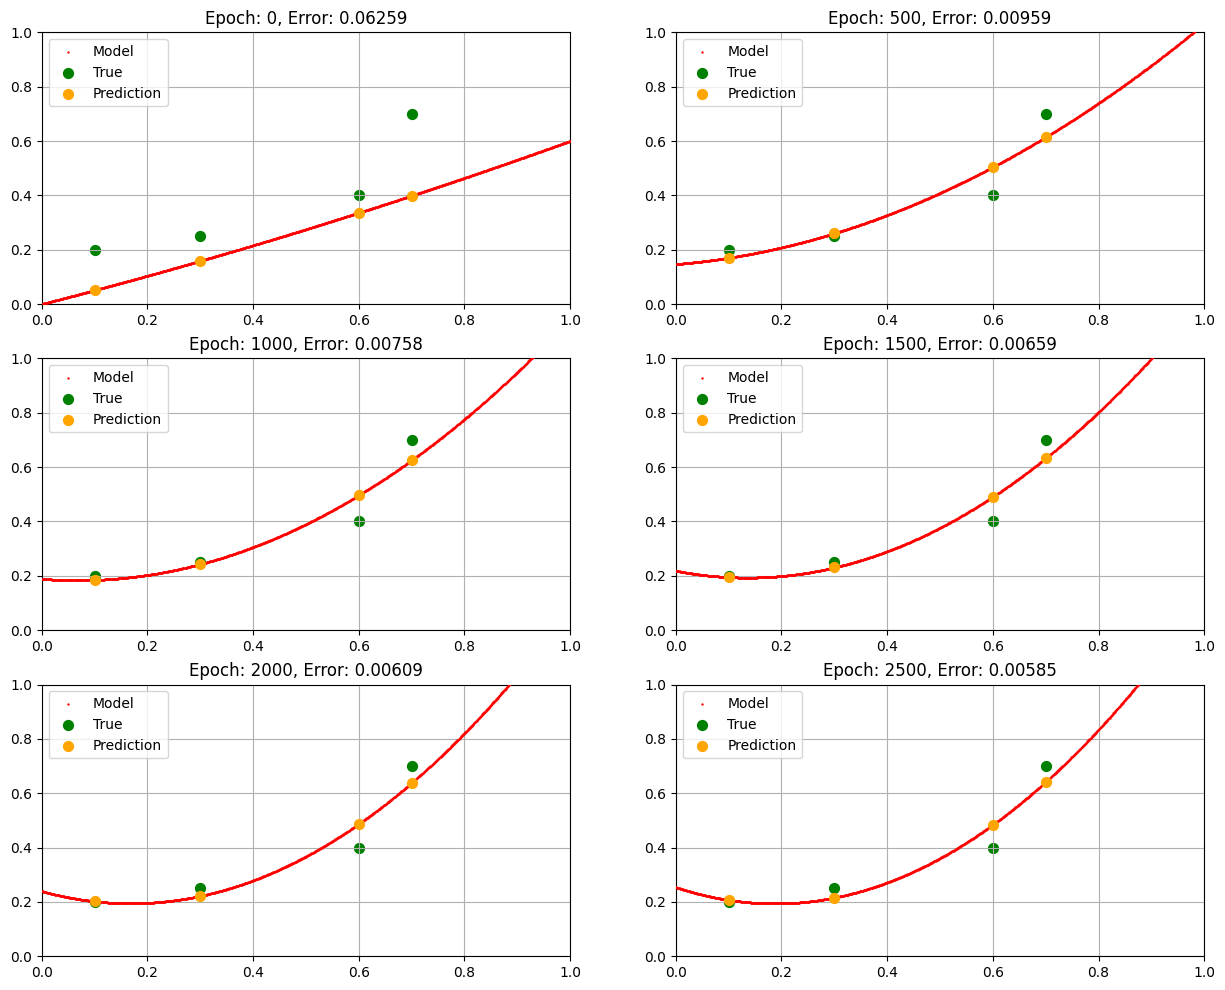

In [12]:
NN = SimpleNeuralNetwork(df['x'].values, df['y'].values)
plot_num = 0
plot_y = 0
fig, ax = plt.subplots(figsize=(15, 12), nrows=3, ncols=2)

for epoch in range(2501):
    NN.forward_pass()
    if epoch % 500 == 0:
        NN.plot_model(epoch, plot_num, nrows=3, ncols=2)
        plot_num += 1
        
    NN.back_prop()
    
plt.show()